$$
% transferring macros:
\let\eps\varepsilon
\let\wt\widetilde
\let\tn\mathrm
\let\vphi\varphi
\let\pa\partial
\let\para\parallel
\let\wh\widehat
\let\sl\shoveleft
\let\lra\leftrightarrow
\let\ov\overline
% defining new macros:
\def\be{\begin{equation} \mskip 1cm}
\def\ee{\end{equation}}
\def\ba{\begin{align} \mskip 1cm}
\def\ea{\end{align}}
\def\RR{{\mathbb R}}
\def\DD{{\mathbb D}}
\def\GG{{\mathbb G}}
\def\CC{{\mathbb C}}
\def\MM{{\mathbb M}}
\def\PP{{\mathbb P}}
\def\JJ{{\mathbb J}}
\def\WW{{\mathbb W}}
\def\HH{{\mathbb H}}
\def\SS{{\mathbb S}}
\def\QQ{{\mathbb Q}}
\def\Bb{{\mathbf B}}
\def\Eb{{\mathbf E}}
\def\Fb{{\mathbf F}}
\def\Ub{{\mathbf U}}
\def\Vb{{\mathbf V}}
\def\Ab{{\mathbf A}}
\def\Jb{{\mathbf J}}
\def\xb{{\mathbf x}}
\def\cb{{\mathbf c}}
\def\eb{{\mathbf e}}
\def\nb{{\mathbf n}}
\def\wb{{\mathbf w}}
\def\ub{{\mathbf u}}
\def\ab{{\mathbf a}}
\def\bb{{\mathbf b}}
\def\rb{{\mathbf r}}
\def\vb{{\mathbf v}}
\def\ib{{\mathbf i}}
\def\jb{{\mathbf j}}
\def\kb{{\mathbf k}}
\def\pb{{\mathbf p}}
\def\qb{{\mathbf q}}
\def\Fb{{\mathbf F}}
\def\Cb{{\mathbf C}}
\def\Yb{{\mathbf Y}}
\def\Mb{{\mathbf M}}
\def\Mcal{\mathcal M}
\def\vs{\mathsf v}
\def\as{\mathsf a}
\def\grad{\tn{grad}}
\def\curl{\tn{curl}}
\def\unit{\mathbb 1}
\def\div{\tn{div}}
\def\Im{\tn{Im}}
\def\vol{\tn{vol}}
\def\dd{\tn{d}}
\def\ii{\tn{i}}
\def\phib{\boldsymbol \phi}
\def\psib{\boldsymbol \psi}
\def\rhob{\boldsymbol \rho}
\def\Lamb{\boldsymbol \Lambda}
\def\ts{\tn s}
\def\tA{\tn A}
\def\tc{\tn c}
\def\ti{\tn i}
\def\te{\tn e}
\def\th{\tn h}
\def\tt{\tn t}
\def\tg{\tn g}
\def\tE{\tn E}
\def\tB{\tn B}
\def\td{\tn d}
\def\tb{\tn b}
\newcommand{\fhD}{f_\tn{h}^\tn{D}}
\newcommand{\whD}{w_\tn{h}^\tn{D}}
\newcommand{\nhD}{n_\tn{h}^\tn{D}}
\newcommand{\jhD}{\jb_\tn{h}^\tn{D}}
% defining new commands:
\newcommand{\abs}[1]{\lvert#1\rvert}
\newcommand{\bold}[1]{{\boldsymbol #1}}
\newcommand{\pder}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\parfra}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\dt}[1]{\frac{\mathrm d #1}{\mathrm dt}}
\newcommand{\ds}[1]{\frac{\mathrm d #1}{\mathrm ds}}
\newcommand{\gavg}[1]{\left\langle #1 \right\rangle}
\def\dd{\mathrm{d}}
\def\pab{\bold \pa}
\newcommand{\etab}{\boldsymbol{\eta}}
\newcommand{\gavg}[1]{\langle #1 \rangle}
$$

# Mappings, pull-backs, Hodge and scalar products in STRUPHY

Detailed notes on differential forms can be found in the manuscript "_Structure-preserving integration of ideal MHD Part I: Theory and numerical scheme_", which can be requested by email from <stefan.possanner@ma.tum.de>.

## Table of contents:

Theory:
* [Mappings](#mappings)
* [Notation for vectors and $p$-forms](#notation)
* [Interior product](#interior)
* [Pullbacks of $p$-forms](#pullbacks)
* [Hodge operator](#hodge)
* [Exterior derivative](#exterior)
* [Scalar product](#scalar)
* [Co-differential operator (integration by parts)](#codiff)

STRUPHY routines:
* [Function for 3D slice plots](#slice)
* [Physical grid and pull back operations](#pullback)
    * [0-forms](#0)
    * [3-forms](#3)
    * [1-forms](#1)
    * [2-forms](#2)
    * [Vector fields](#v)

## Mappings <a class="anchor" id="mappings"></a>

In this notebook we discuss the use of mappings 

$$
\be  \label{def:F}
F: U\to \Omega\,,\qquad \etab \mapsto F(\etab) =  \xb\,,
\ee
$$

between the logical domain $U$, which is usually the cube $U = [0,1]^3$, and the physical domain $\Omega \subset \RR^3$. The logical coordinates are denoted by $\etab = (\eta_1, \eta_2, \eta_3) \in U$, whereas the physical coordinates are denoted by $\xb=(x,y,z)\in \Omega$. The mapping $F$ is supposed to be $C^1(U,\Omega)$.

In what follows we need the Jacobian matrix $DF$ of $F$, 

$$
\be
 DF : U \to  \RR^{n\times n}\,,\qquad (DF)_{i,j} := \pder{F_i}{\eta_j}\,,
\ee
$$

as well as the _metric tensor_ $G$ induced by $F$ and its determinant,

$$
\be
 G: U \to \RR^{n\times n}\,,\qquad G = (g_{i,j})_{i,j} = (DF)^\top DF\,,\qquad g := \det G\qquad \sqrt{g} = \det DF\,.
\ee
$$

## Notation for vectors and $p$-forms <a class="anchor" id="notation"></a>

Let us fix the notation of vectors and of $p$-forms in 3D. A __vector-field__ $\mathsf a$ is a *contra-variant* object; it is written as

$$
\be \label{vec}
 \mathsf a = \widetilde \ab(\xb) = DF(\etab)\, \bar \ab(\etab) \,, \qquad \mathsf a \lra    \bar \ab = (\bar a^1, \bar a^2, \bar a^3)\,.
\ee
$$

Here, $\widetilde \ab(\xb) \in \RR^3$ are the components of the vector-field in physical space ("as we see/measure it") and $\bar \ab(\etab)\in \RR^3$ denotes the three contra-variant components in logical space, written by convention with an upper index. By definition, the columns of the Jacobian $DF$ are tangent to the coordinates lines of $F$ obtained when only $\eta_j$ is varied and the other $\eta_{i\neq j}$ are held fixed. In case the mapping is also Cartesian, $F(\etab) = (L_x \eta_1, L_y \eta_2, L_z \eta_3)$, we have

$$
\be 
 \mathsf a = \widetilde \ab(\xb) = \begin{pmatrix} 
 L_x & 0 & 0
 \\
 0 & L_y & 0
 \\
 0 & 0 & L_z
 \end{pmatrix}
 \, \bar \ab(\etab)\,, \qquad \mathsf a \lra    \bar \ab = (\bar a^1, \bar a^2, \bar a^3)\,.
\ee
$$

We use the left-right-arrow $\lra$ to identify the abstract vector-field with its components defined by the mapping $F$. For __differentiable $p$-forms__ in 3D we write 

$$
\begin{alignat}{2}
 &\alpha^0 = \tilde a(\xb) = a(\etab) \,, && \alpha^0 \lra a  
\label{a0}
 \\[4mm]
 &\alpha^1 = \widetilde \ab(\xb) = (DF)^{-\top}(\etab)\,\ab(\etab)\,, && \alpha^1 \lra \ab = (a_1, a_2, a_3)\,, 
\label{a1}
 \\[3mm]
 &\alpha^2 = \widetilde{\ab}(\xb) = \frac{1}{\sqrt g (\etab)} DF(\etab)\, \hat \ab(\etab)\,, \qquad && 
\alpha^2 \lra \hat\ab = (a_{23}, a_{31}, a_{12})\,,  \label{a2}
 \\[1mm]
 &\alpha^3 = \widetilde a(\xb) = \frac{1}{\sqrt g(\etab)}\, a_{123}(\etab) && \alpha^3 \lra a_{123} \,.  \label{a3}
\end{alignat}
$$

We use again the left-right-arrow $\lra$ to identify the form with its components defined by the mapping $F$. Note that 1-forms are *co-variant* objects and their components by convention written with a lower index. Components of 2-forms are indexed with 2 indices and 3-forms with three indices. Moreover, the component-vector of a 2-form carries a hat ("pseudo-vector").

Here, $\widetilde \ab(\xb) \in \RR^3$ are again the components of "vector-field" (or "form-field") in physical space ("as we see/measure it"). However, this "vector-field" is now represented in terms of forms, rather than vectors. From the formulas \eqref{vec}, \eqref{a1} and \eqref{a2} we now have three different possibilities of representing the physical "vector-field" $\widetilde \ab(\xb)$:

1. as a true vector-field: $\widetilde \ab = DF\, \bar \ab$.


2. as a 1-form: $\widetilde \ab = (DF)^{-\top}\,\ab$.


3. as a 2-form: $\widetilde \ab = \frac{1}{\sqrt g } DF\, \hat \ab$.

__Each representation has of course different coefficients $\bar \ab$, $\ab$ and $\hat \ab$, respectively. You can choose at the beginning of your program how to represent a given physical vector field.__ The same can be said for functions $a(\xb)$, which can be represented either as 0-forms or as 3-forms.

To change between vector- and 1-form-representation we introduce the __flat operator__ 
$\flat$, also called "index-lowering operator"

$$
\begin{alignat}{2}
 \flat:\ \mathsf a \mapsto 
\flat\,\mathsf a \,,\quad &&\bar \ab \mapsto G \bar \ab = \ab =
(a_i)_i\,,\quad  a_i = \sum_{j=1}^n g_{ij}a^j \,,  \label{def:flat}
\end{alignat}
$$

and its inverse, the __sharp operator__ $\sharp$, or "index-raising operator"

$$
\begin{alignat}{2}
\sharp:\ \alpha^1 \mapsto 
\sharp\,\alpha^1\,,\quad  &&\ab \mapsto G^{-1} \ab = \bar \ab = (a^i)_i\,, \quad a^i = \sum_{j=1}^n g^{ij}a_j 
\,.  \label{def:sharp}
\end{alignat}
$$

The relation between vector and 2-form-representation involves the interior product and is given by formula \eqref{2tovec}. To change between 1-form and 2-form representation we need the Hodge operator (see below).


## Interior product <a class="anchor" id="interior"></a>

The interior product, denoted by $i$, is between a vector and a $p$-form. It returns a ($p$-1)-form and is defined by

$$
\be \label{interiors}
 i_\vs \alpha^0 = 0\,,\qquad i_\vs \alpha^1 \lra \ab^\top \bar \vb\,, \qquad i_\vs \alpha^2 \lra \hat 
\ab \times \bar \vb\,, \qquad i_\vs \alpha^3 \lra a_{123} \bar \vb\,. 
\ee
$$

For $n=3$, the interior product allows one to define 
a one-to-one correspondence between a vector-field $\as$ and a 2-form $\alpha^2$ via

$$
\be \label{2tovec}
 \as \lra \bar \ab\,,\qquad \alpha^2 = i_\as \tn{vol}^3 \lra  o\sqrt{g}\, \bar \ab\,.
\ee
$$

In addition to the flat operator \eqref{def:flat}, this is
another way of relating a vector to a differential form. 


## Pullbacks of $p$-forms <a class="anchor" id="pullbacks"></a>

It is quite natural to start out with $p$-forms defined on the physical domain $\Omega$ and to pull them back to the logical $U$ domain under map $F$ defined in \eqref{def:F}. In the physical domain, there is no difference between vectors, 1-forms and 2-forms, everything is a "physical vector field" $\widetilde \ab(\xb)$ ("as we see/measure it"). Similar for functions (0-forms) and 3-forms. After the pullback the $p$-form is still a $p$-form, but expressed in logical coordinates. The formulas for this read as follows: 

$$
\begin{alignat}{2}
  &0\tn{-forms:}\qquad a(\etab) &&= \widetilde a (F(\etab))\,, \label{pull:0}
 \\[3mm]
  &1\tn{-forms:}\qquad\ab(\etab) &&= (DF)^\top \widetilde \ab(F(\etab))\,,  \label{pull:1}
 \\[2mm]
  &2\tn{-forms:}\qquad \hat\ab(\etab) &&= \sqrt g 
(DF)^{-1} \widetilde{\ab}(F(\etab)) \,,  \label{pull:2}
 \\[2mm]
  &3\tn{-forms:}\qquad a_{123}(\etab) &&= \sqrt g\, \widetilde a(F(\etab)) \,,  \label{pull:3}
\end{alignat}
$$

Recall that the tilde indicates components in Cartesian (physical) coordinates. 



## Hodge operator <a class="anchor" id="hodge"></a>

The Hodge operator transforms a $p$-forms into a ($3-p$)-form with the following components:

$$
\begin{alignat}{3}
 &\alpha^0 \lra a \qquad &\Leftrightarrow\qquad & *\alpha^0 \lra o\sqrt{g}\, a
 \\[5mm]
 & \alpha^1 \lra \ab \qquad &\Leftrightarrow\qquad & *\alpha^1 \lra o\sqrt{g}\, 
G^{-1}\ab
 \\[3mm]
 & \alpha^2 \lra \hat\ab \qquad &\Leftrightarrow\qquad & *\alpha^2 \lra o \frac{1}{\sqrt{g}} G\, 
\hat \ab
 \\[1mm]
 & \alpha^3 \lra a_{123} \qquad &\Leftrightarrow\qquad & *\alpha^3 \lra o\frac{1}{\sqrt{g}}\, 
a_{123}\,.
\end{alignat}
$$


## Exterior derivative <a class="anchor" id="exterior"></a>

The exterior derivative transforms a $p$-form into a ($p+1$)-form acts as follows:

$$
\be \label{def:d}
 \tn d \alpha^0 \lra \nabla a\,,\qquad \tn d \alpha^1 \lra \nabla \times \ab\,,\qquad \tn d 
\alpha^2 \lra \nabla \cdot \hat \ab\,,\qquad \tn d \alpha^3 = 0 \,.
\ee
$$


## Scalar product <a class="anchor" id="scalar"></a>

Hilbert spaces of $p$-forms are defined by means of the following scalar products:

$$
\begin{align}
 (\alpha^0,\,\beta^0) &= \int_U a\,b\,\sqrt{g}\,\tn d\etab\,, \label{sc:0}
 \\[2mm]
 (\alpha^1,\,\beta^1) &= \int_U \ab^\top G^{-1} \bb\,\sqrt{g}\,\tn d\etab\,, \label{sc:1}
 \\[2mm]
 (\alpha^2,\,\beta^2) &= \int_U \hat\ab^\top G\,\hat \bb\,\frac{1}{\sqrt{g}}\,\tn d\etab\,, 
\label{sc:2}
 \\[2mm]
 (\alpha^3,\,\beta^3) &= \int_U a_{123} b_{123}\,\frac{1}{\sqrt{g}}\,\tn d\etab\,.  \label{sc:3}
\end{align}
$$


## Co-differential operator (integration by parts) <a class="anchor" id="codiff"></a>

The adjoint of the exterior derivative (co-differential) reads

$$
\be
 (\tn d \alpha^{p-1},\, \beta^p) = (-1)^p (\alpha^{p-1},\, * \dd * \beta^p )\,,
\ee
$$

where $*$ is the Hodge operator.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as colmap
from mpl_toolkits.mplot3d import Axes3D

import hylife.geometry.mappings_analytical as mp

import hylife.utilitis_FEEC.bsplines as bsp

In [2]:
#-----------------------------------------
# Define mapping from mappings_analytical:
#-----------------------------------------

# We suppose the physical domain to be a hollow cylinder with
R1 = 1.
R2 = 7.
Lz = 10.

args_map  = 2, [R1, R2, Lz]

# Some function in physical domain:
r = lambda x, y : np.sqrt(x**2 + y**2)
theta = lambda x, y : np.arctan2(y, x)
fun1_phys = lambda x, y, z : np.sin( 2*np.pi*( (r(x,y)-R1)/(R2-R1) ) )
fun2_phys = lambda x, y, z : np.sin( 3*theta(x, y) )*np.sin( np.pi*( (r(x,y)-R1)/(R2-R1) ) )
fun3_phys = lambda x, y, z : np.sin( 4*np.pi*z/Lz )

#-----------------
# Create the grid:
#-----------------
# side lengths of logical cube
L = [1., 1., 1.] 

# spline degrees
p = [3, 3, 3]   

# periodic boundary conditions (use 'False' if clamped)
bc = [False, True, True]

# number of elements
Nel = [32, 32, 32]   

# element boundaries
el_b = [np.linspace(0., L, Nel + 1) for L, Nel in zip(L, Nel)] 

# knot sequences
T = [bsp.make_knots(el_b, p, bc) for el_b, p, bc in zip(el_b, p, bc)] 

# Greville points
G = [bsp.greville(T, p, bc) for T, p, bc in zip(T, p, bc)]

## Function for 3D slice plots <a class="anchor" id="slice"></a>

In [3]:
def plot_slice_3D(fun_h, el_b, fun_phys, x, y, z, xi3_dn, xi3_up, xi2, grid=False):
    
    '''
    Plots logical and physical grid (with stride=2) and logical and physical function fun_h.
    
    Parameters:
    -----------
        fun_h: 3D array-like
            Function values on logical domain at vertices defined by el_b. 
            
        el_b: list of 1D array-like
            Grid points for function evaluation in logical domain.
            
        fun_phys_h: 3D array-like
            Push-forward evaluated at at x, y, z. 
            
        x, y, z: 3D array-like
            Physical grid points with same shape as fun_h.
            
        xi3_dn: float
            xi3 = xi3_dn defines the lower (xi1,xi2)-slice plot. 
            
        xi3_up: float
            xi3 = xi3_up defines the upper (xi1,xi2)-slice plot. 
            
        xi3_dn, xi3_up, xi2: float
            xi2 = xi2 defines the (xi1,xi3)-slice plot.      
    '''

    i3_dn = np.argmin( np.abs( el_b[2]-xi3_dn ) )
    i3_up = np.argmin( np.abs( el_b[2]-xi3_up ) )
    i2    = np.argmin( np.abs( el_b[1]-xi2 ) )
    
    qq1, qq2 = np.meshgrid( el_b[0], el_b[1], indexing='ij' )
    qq3_dn = np.ones( qq1.shape )*el_b[2][i3_dn]
    qq3_up = np.ones( qq1.shape )*el_b[2][i3_up]

    pp1, pp3 = np.meshgrid( el_b[0], el_b[2], indexing='ij' )
    pp2 = np.ones( pp1.shape )*el_b[1][i2]

    if grid:
        
        fig = plt.figure(figsize=(12,8))
        ax  = fig.add_subplot(121, projection='3d')
        ax2 = fig.add_subplot(122, projection='3d')

        ax.plot_wireframe( qq1, qq2, qq3_dn, rstride=2 )
        ax.plot_wireframe( qq1, qq2, qq3_up, rstride=2 )
        ax.plot_wireframe( pp1, pp2, pp3,    rstride=2 )
        ax.set_title('Elements in logical space')
        ax.set_xlabel('$\eta_1$')
        ax.set_ylabel('$\eta_2$')
        ax.set_zlabel('$\eta_3$')

        ax2.plot_wireframe( x[:,:,i3_dn], y[:,:,i3_dn], z[:,:,i3_dn], rstride=2 )
        ax2.plot_wireframe( x[:,:,i3_up], y[:,:,i3_up], z[:,:,i3_up], rstride=2 )
        ax2.plot_wireframe( x[:,i2,:], y[:,i2,:], z[:,i2,:], rstride=2 )
        ax2.set_title('Elements in physical space')
        ax2.set_xlabel('$x$')
        ax2.set_ylabel('$y$')
        ax2.set_zlabel('$z$')

    fig = plt.figure(figsize=(12,8))
    ax  = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122, projection='3d')

    obj_col = colmap.ScalarMappable(cmap=plt.cm.hot)
    rgb_arr1 = obj_col.to_rgba( fun_h[:,:,i3_dn] )
    rgb_arr2 = obj_col.to_rgba( fun_h[:,:,i3_up] )
    rgb_arr3 = obj_col.to_rgba( fun_h[:,i2,:] )

    ax.plot_surface( qq1, qq2, qq3_dn, facecolors=rgb_arr1 )
    ax.plot_surface( qq1, qq2, qq3_up, facecolors=rgb_arr2 )
    ax.plot_surface( pp1, pp2, pp3,    facecolors=rgb_arr3 )
    ax.set_title('logical')
    ax.set_xlabel('$\eta_1$')
    ax.set_ylabel('$\eta_2$')
    ax.set_zlabel('$\eta_3$')
    
    obj_col = colmap.ScalarMappable(cmap=plt.cm.hot)
    rgb_arr1_phys = obj_col.to_rgba( fun_phys[:,:,i3_dn] )
    rgb_arr2_phys = obj_col.to_rgba( fun_phys[:,:,i3_up] )
    rgb_arr3_phys = obj_col.to_rgba( fun_phys[:,i2,:] )
    
    #print(rgb_arr1_phys)

    ax2.plot_surface( x[:,:,i3_dn], y[:,:,i3_dn], z[:,:,i3_dn], facecolors=rgb_arr1_phys )
    ax2.plot_surface( x[:,:,i3_up], y[:,:,i3_up], z[:,:,i3_up], facecolors=rgb_arr2_phys )
    ax2.plot_surface( x[:,i2,:], y[:,i2,:], z[:,i2,:], facecolors=rgb_arr3_phys )
    ax2.set_title('physical')
    ax2.set_xlabel('$x$')
    ax2.set_ylabel('$y$')
    ax2.set_zlabel('$z$')

## Physical grid and pull back operations <a class="anchor" id="pullback"></a>

We shall evaluate the functions at the element boundaries in `el_b`.

For each type of field (vector, p-form), we check the identity `id = push(pull(.))` on the grid.

### 0-forms <a class="anchor" id="0"></a>

max error for id = push(pull(.)):    2.220446049250313e-16


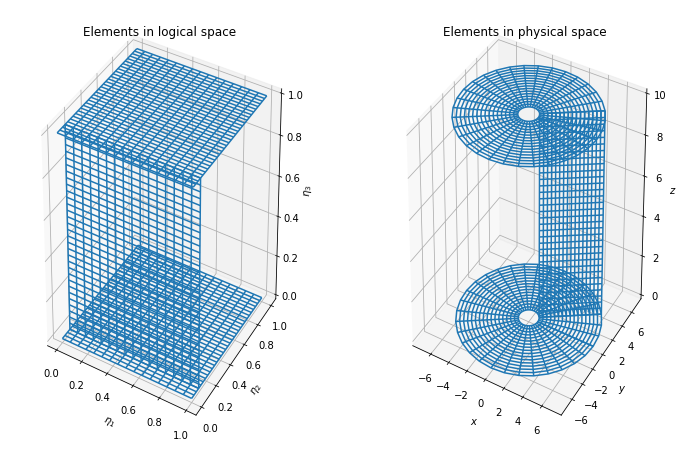

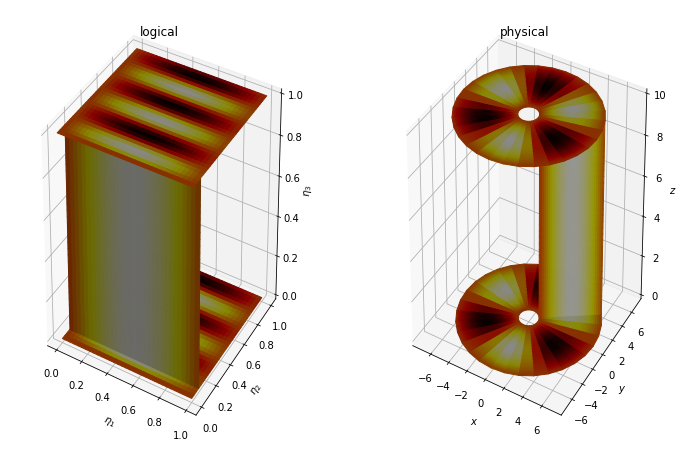

In [4]:
# Create a callable on the logical domain that could be passed to the projectors, push-forwards:
fun_0 = lambda xi1, xi2, xi3 : mp.pull_0( fun2_phys, xi1, xi2, xi3, *args_map )

# Alternatively, directly evaluate the pullback at the element vertices:
fun_0_h = mp.pull_0( fun2_phys, el_b[0], el_b[1], el_b[2], *args_map )

# FOR TESTING push forward the created callable:
x, y, z, fun_0_phys_h = mp.push_0( fun_0, el_b[0], el_b[1], el_b[2], *args_map ) 

# check the identity id = push(pull(.)):
fun_phys_true = fun2_phys(x, y, z)
print( 'max error for id = push(pull(.)):   ', np.max( np.abs(fun_0_phys_h - fun_phys_true) ) )

# Sloce plot in 3D
plot_slice_3D( fun_0_h, el_b, fun_0_phys_h, x, y, z, 0., 1., .1, True )

### 3-forms <a class="anchor" id="3"></a>

max error for id = push(pull(.)):    2.220446049250313e-16


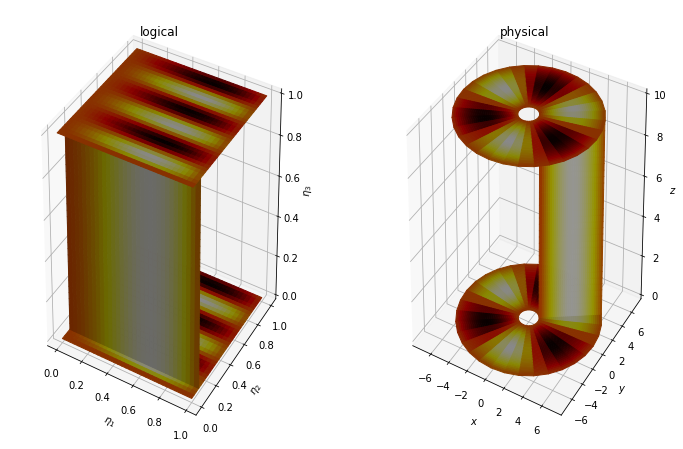

In [5]:
# Create a callable on the logical domain that could be passed to the projectors, push-forwards:
fun_3 = lambda xi1, xi2, xi3 : mp.pull_3( fun2_phys, xi1, xi2, xi3, *args_map )

# Alternatively, directly evaluate the pullback at the element vertices:
fun_3_h = mp.pull_3( fun2_phys, el_b[0], el_b[1], el_b[2], *args_map )

# FOR TESTING push forward the created callable:
x, y, z, fun_3_phys_h = mp.push_3( fun_3, el_b[0], el_b[1], el_b[2], *args_map ) 

# check the identity id = push(pull(.)):
fun_phys_true = fun2_phys(x, y, z)
print( 'max error for id = push(pull(.)):   ', np.max( np.abs(fun_3_phys_h - fun_phys_true) ) )

# Sloce plot in 3D
plot_slice_3D( fun_3_h, el_b, fun_3_phys_h, x, y, z, 0., 1., .1 )

### 1-forms <a class="anchor" id="1"></a>

max error first  component for id = push(pull(.)):    4.440892098500626e-16
max error second component for id = push(pull(.)):    3.3306690738754696e-16
max error third  component for id = push(pull(.)):    4.440892098500626e-16


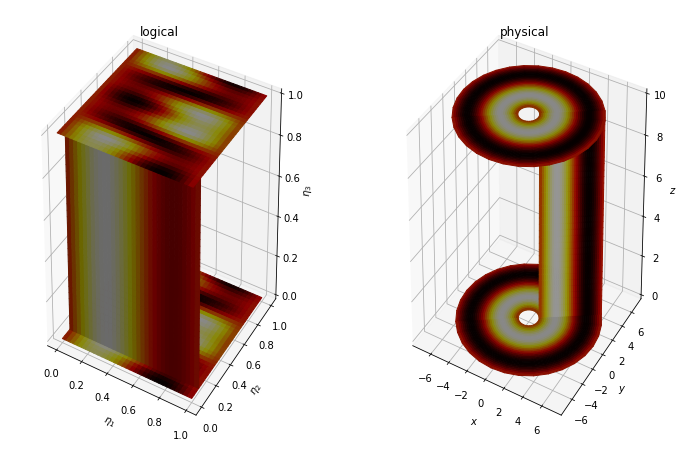

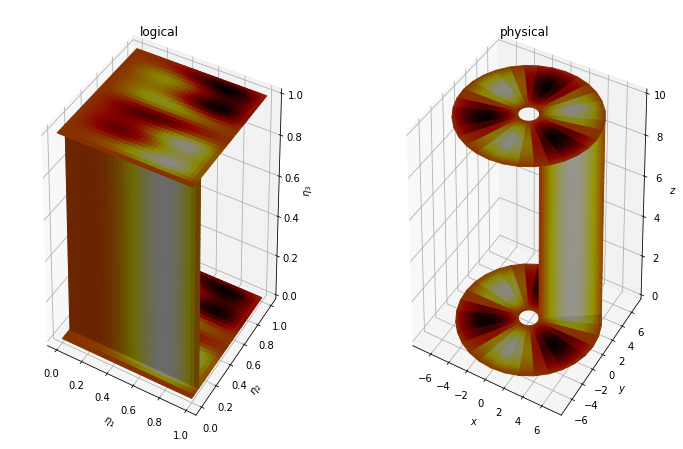

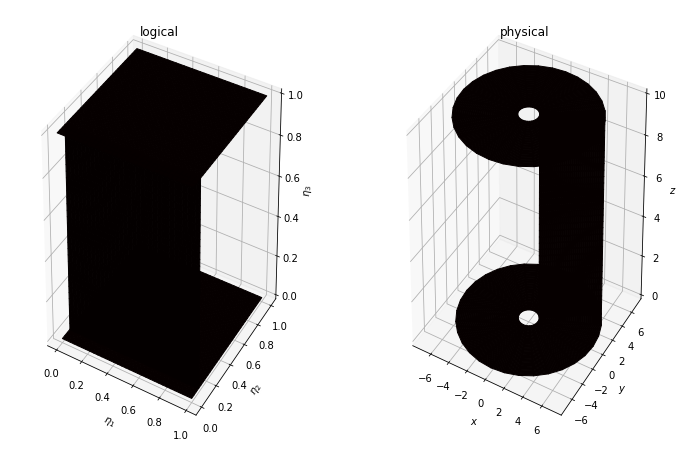

In [6]:
# Create callables on the logical domain that could be passed to the projectors, push-forwards:
fun_11 = lambda xi1, xi2, xi3 : mp.pull_1( fun1_phys, fun2_phys, fun3_phys, 1, xi1, xi2, xi3, *args_map )
fun_12 = lambda xi1, xi2, xi3 : mp.pull_1( fun1_phys, fun2_phys, fun3_phys, 2, xi1, xi2, xi3, *args_map )
fun_13 = lambda xi1, xi2, xi3 : mp.pull_1( fun1_phys, fun2_phys, fun3_phys, 3, xi1, xi2, xi3, *args_map )

# Alternatively, directly evaluate the pullback at the element vertices:
fun_11_h = mp.pull_1( fun1_phys, fun2_phys, fun3_phys, 1, el_b[0], el_b[1], el_b[2], *args_map )
fun_12_h = mp.pull_1( fun1_phys, fun2_phys, fun3_phys, 2, el_b[0], el_b[1], el_b[2], *args_map )
fun_13_h = mp.pull_1( fun1_phys, fun2_phys, fun3_phys, 3, el_b[0], el_b[1], el_b[2], *args_map )

# FOR TESTING push forward the created callables:
x, y, z, fun_11_phys_h = mp.push_1( fun_11, fun_12, fun_13, 1, el_b[0], el_b[1], el_b[2], *args_map )
x, y, z, fun_12_phys_h = mp.push_1( fun_11, fun_12, fun_13, 2, el_b[0], el_b[1], el_b[2], *args_map )
x, y, z, fun_13_phys_h = mp.push_1( fun_11, fun_12, fun_13, 3, el_b[0], el_b[1], el_b[2], *args_map )

# check the identity id = push(pull(.)):
fun1_phys_true = fun1_phys(x, y, z)
fun2_phys_true = fun2_phys(x, y, z)
fun3_phys_true = fun3_phys(x, y, z)
print( 'max error first  component for id = push(pull(.)):   ', np.max( np.abs(fun_11_phys_h - fun1_phys_true) ) )
print( 'max error second component for id = push(pull(.)):   ', np.max( np.abs(fun_12_phys_h - fun2_phys_true) ) )
print( 'max error third  component for id = push(pull(.)):   ', np.max( np.abs(fun_13_phys_h - fun3_phys_true) ) )

# Sloce plot in 3D
plot_slice_3D( fun_11_h, el_b, fun_11_phys_h, x, y, z, 0., 1., .1 )
plot_slice_3D( fun_12_h, el_b, fun_12_phys_h, x, y, z, 0., 1., .1 )
plot_slice_3D( fun_13_h, el_b, fun_13_phys_h, x, y, z, 0., 1., .1 )

### 2-forms <a class="anchor" id="2"></a>

max error first  component for id = push(pull(.)):    4.440892098500626e-16
max error second component for id = push(pull(.)):    3.3306690738754696e-16
max error third  component for id = push(pull(.)):    4.440892098500626e-16


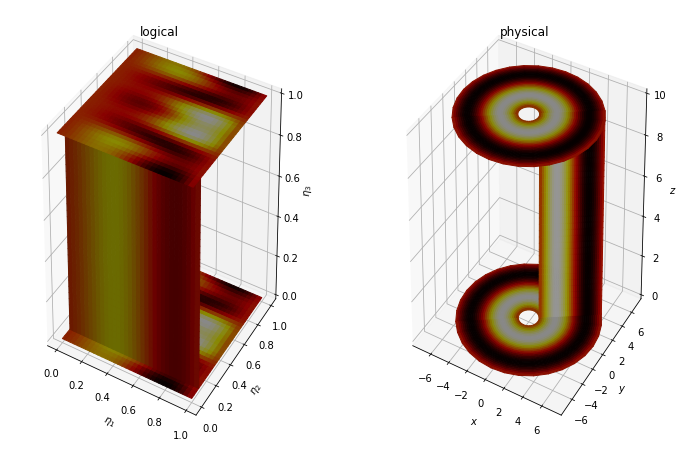

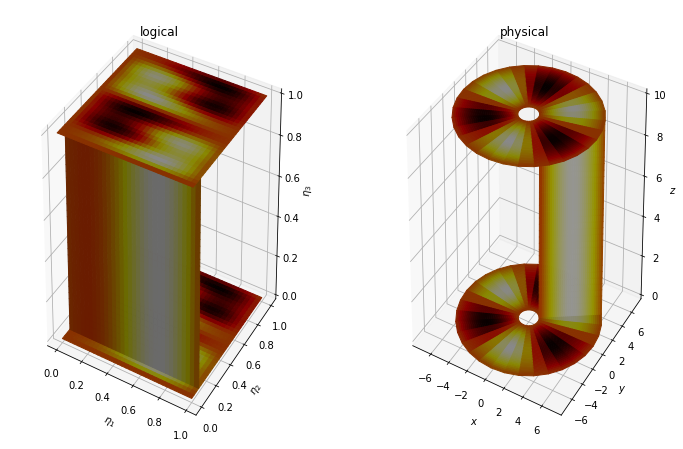

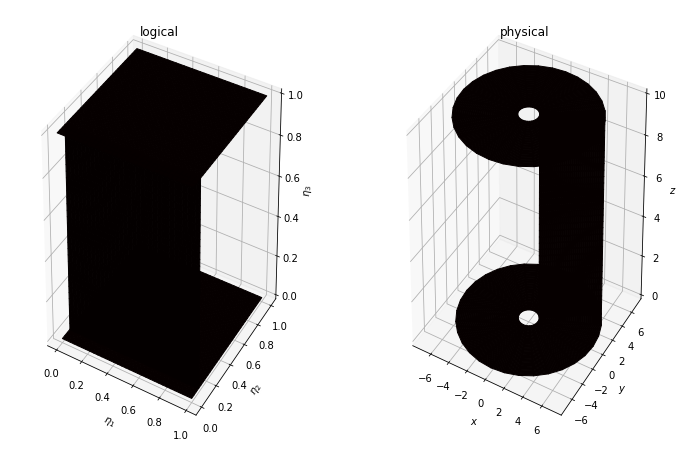

In [7]:
# Create callables on the logical domain that could be passed to the projectors, push-forwards:
fun_21 = lambda xi1, xi2, xi3 : mp.pull_2( fun1_phys, fun2_phys, fun3_phys, 1, xi1, xi2, xi3, *args_map )
fun_22 = lambda xi1, xi2, xi3 : mp.pull_2( fun1_phys, fun2_phys, fun3_phys, 2, xi1, xi2, xi3, *args_map )
fun_23 = lambda xi1, xi2, xi3 : mp.pull_2( fun1_phys, fun2_phys, fun3_phys, 3, xi1, xi2, xi3, *args_map )

# Alternatively, directly evaluate the pullback at the element vertices:
fun_21_h = mp.pull_2( fun1_phys, fun2_phys, fun3_phys, 1, el_b[0], el_b[1], el_b[2], *args_map )
fun_22_h = mp.pull_2( fun1_phys, fun2_phys, fun3_phys, 2, el_b[0], el_b[1], el_b[2], *args_map )
fun_23_h = mp.pull_2( fun1_phys, fun2_phys, fun3_phys, 3, el_b[0], el_b[1], el_b[2], *args_map )

# FOR TESTING push forward the created callables:
x, y, z, fun_21_phys_h = mp.push_2( fun_21, fun_22, fun_23, 1, el_b[0], el_b[1], el_b[2], *args_map )
x, y, z, fun_22_phys_h = mp.push_2( fun_21, fun_22, fun_23, 2, el_b[0], el_b[1], el_b[2], *args_map )
x, y, z, fun_23_phys_h = mp.push_2( fun_21, fun_22, fun_23, 3, el_b[0], el_b[1], el_b[2], *args_map )

# check the identity id = push(pull(.)):
fun1_phys_true = fun1_phys(x, y, z)
fun2_phys_true = fun2_phys(x, y, z)
fun3_phys_true = fun3_phys(x, y, z)
print( 'max error first  component for id = push(pull(.)):   ', np.max( np.abs(fun_21_phys_h - fun1_phys_true) ) )
print( 'max error second component for id = push(pull(.)):   ', np.max( np.abs(fun_22_phys_h - fun2_phys_true) ) )
print( 'max error third  component for id = push(pull(.)):   ', np.max( np.abs(fun_23_phys_h - fun3_phys_true) ) )

# Sloce plot in 3D
plot_slice_3D( fun_21_h, el_b, fun_21_phys_h, x, y, z, 0., 1., .1 )
plot_slice_3D( fun_22_h, el_b, fun_22_phys_h, x, y, z, 0., 1., .1 )
plot_slice_3D( fun_23_h, el_b, fun_23_phys_h, x, y, z, 0., 1., .1 )

### Vector fields <a class="anchor" id="v"></a>

max error first  component for id = push(pull(.)):    3.3306690738754696e-16
max error second component for id = push(pull(.)):    3.3306690738754696e-16
max error third  component for id = push(pull(.)):    4.440892098500626e-16


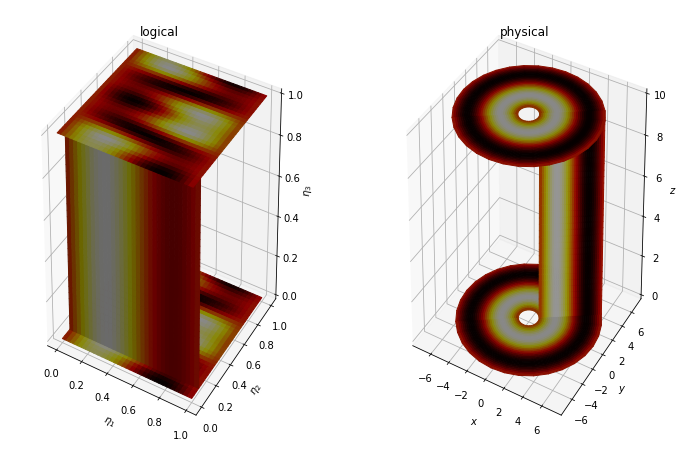

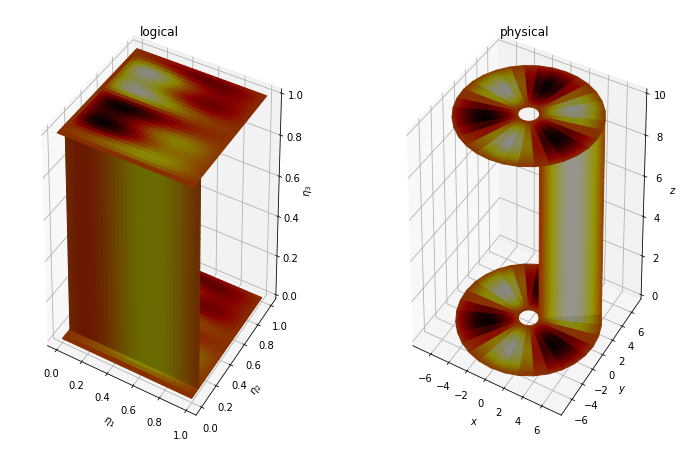

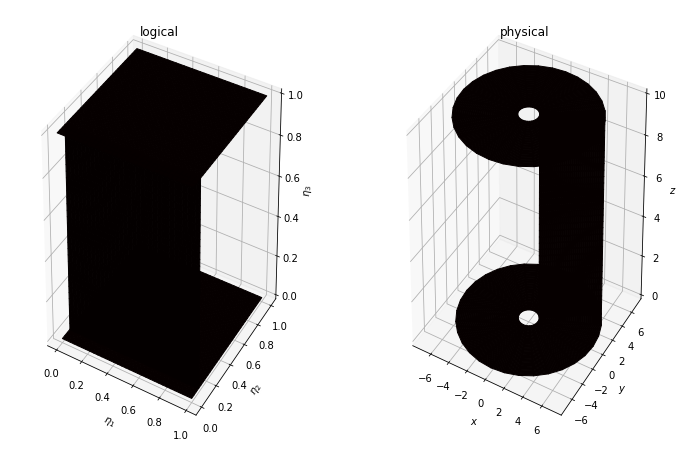

In [8]:
# Create callables on the logical domain that could be passed to the projectors, push-forwards:
fun_v1 = lambda xi1, xi2, xi3 : mp.pull_v( fun1_phys, fun2_phys, fun3_phys, 1, xi1, xi2, xi3, *args_map )
fun_v2 = lambda xi1, xi2, xi3 : mp.pull_v( fun1_phys, fun2_phys, fun3_phys, 2, xi1, xi2, xi3, *args_map )
fun_v3 = lambda xi1, xi2, xi3 : mp.pull_v( fun1_phys, fun2_phys, fun3_phys, 3, xi1, xi2, xi3, *args_map )

# Alternatively, directly evaluate the pullback at the element vertices:
fun_v1_h = mp.pull_v( fun1_phys, fun2_phys, fun3_phys, 1, el_b[0], el_b[1], el_b[2], *args_map )
fun_v2_h = mp.pull_v( fun1_phys, fun2_phys, fun3_phys, 2, el_b[0], el_b[1], el_b[2], *args_map )
fun_v3_h = mp.pull_v( fun1_phys, fun2_phys, fun3_phys, 3, el_b[0], el_b[1], el_b[2], *args_map )

# FOR TESTING push forward the created callables:
x, y, z, fun_v1_phys_h = mp.push_v( fun_v1, fun_v2, fun_v3, 1, el_b[0], el_b[1], el_b[2], *args_map )
x, y, z, fun_v2_phys_h = mp.push_v( fun_v1, fun_v2, fun_v3, 2, el_b[0], el_b[1], el_b[2], *args_map )
x, y, z, fun_v3_phys_h = mp.push_v( fun_v1, fun_v2, fun_v3, 3, el_b[0], el_b[1], el_b[2], *args_map )

# check the identity id = push(pull(.)):
fun1_phys_true = fun1_phys(x, y, z)
fun2_phys_true = fun2_phys(x, y, z)
fun3_phys_true = fun3_phys(x, y, z)
print( 'max error first  component for id = push(pull(.)):   ', np.max( np.abs(fun_v1_phys_h - fun1_phys_true) ) )
print( 'max error second component for id = push(pull(.)):   ', np.max( np.abs(fun_v2_phys_h - fun2_phys_true) ) )
print( 'max error third  component for id = push(pull(.)):   ', np.max( np.abs(fun_v3_phys_h - fun3_phys_true) ) )

# Sloce plot in 3D
plot_slice_3D( fun_v1_h, el_b, fun_v1_phys_h, x, y, z, 0., 1., .1 )
plot_slice_3D( fun_v2_h, el_b, fun_v2_phys_h, x, y, z, 0., 1., .1 )
plot_slice_3D( fun_v3_h, el_b, fun_v3_phys_h, x, y, z, 0., 1., .1 )